# ♠ Sell Prediction ♠

Importing necessary files

In [1]:
# Importing pandas to read file
import pandas as pd

In [2]:
# Reading csv file directly from url
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)

# Display data
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [3]:
# Checking the shape of data (Rows, Column)
data.shape

(200, 4)

# Display the relationship of sales to TV, Radio, Newspaper

In [4]:
# Importing seaborn for data visualization
import seaborn as sns

# for plotting within notebook
% matplotlib inline

C:\Users\NILOY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


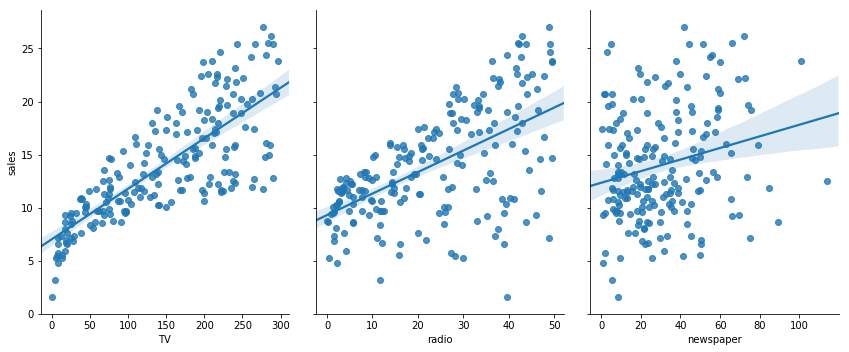

In [34]:
sns.pairplot(data, x_vars=('TV','radio','newspaper'), y_vars='sales', height = 5, aspect = .8, kind='reg');

# This is just a warning that in future this module will moderate.

# Storing data separately

In [6]:
# Create a python list
feature_cols = ["TV", "radio", "newspaper"]
response_col = ["sales"]

# Storing values into X
X = data[feature_cols]

# Display X
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
# Display the shape of features
X.shape

(200, 3)

In [8]:
# Storing response_col in y
y = data[response_col]

# Display the sales column
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [9]:
# Display the shape of response column
y.shape

(200, 1)

# Splitting X and y into train and test

In [26]:
from sklearn.cross_validation import train_test_split
split = .30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = split)

In [27]:
# See if the split works or not
print("X_Train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))
print("y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

X_Train: (140, 2)
X_test: (60, 2)
y_train: (140, 1)
y_test: (60, 1)


# Import Linear Regression

In [28]:
# Import model
from sklearn.linear_model import LinearRegression

# Store into a classifier
clf = LinearRegression()

In [29]:
# Fit the model by X_train, y_test
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Prediction
y_pred = clf.predict(X_test)

# Accuracy

In [31]:
# Error_evaluation
import numpy as np
from sklearn import metrics

print("Error: {0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Error: 1.9154756731764258


# We can also minimize this error by removing newspaper column. As newspaper has week linear relation to sales.

In [32]:
# Feature columns
f_col = ["TV", "radio"]
r_col = ["sales"]

# Store into X and y
X = data[f_col]
y = data[r_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Fit the model 
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Error evaluation
print("New Error: {0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

New Error: 1.3879034699382886


So as you can see that our error has decreased 1.92 to 1.39. And that is a good news for our model. So if we spent more money in TV and radio, instead of newspaper then sells will go high.

# Thank You

© NELOY CHANDRA BARDHAN